# Decision Tree

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, classification_report, auc, accuracy_score, roc_curve, precision_recall_curve,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



In [ ]:
#reading the preprocessed data - (output of phase 1)
data = pd.read_csv('/content/final_df.csv')

In [ ]:

data.columns

Index(['raceId', 'season', 'raceNumber', 'prixName', 'raceDate', 'driverId',
       'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorRacePoints', 'driverNumber',
       'driverDateOfBirth', 'driverNationality', 'constructorName',
       'constructorNationality', 'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'driverDnf',
       'constructorDnf'],
      dtype='object')

In [ ]:
#selecting features depending on correlation matrix from EDA performed
features = ['season','driverId','constructorId', 'driverStartGridPos',
            'driverFinalGridPos', 'driverChampionshipStandingPosition',
            'constructorChampionshipStandingPosition']

#Dropping unnecessary features and setting target variable - driver ranking in each race
X = data[features]
y = data['driverFinalRank']

# split dataset into training(80%) and testing sets (20%) and stratifying over season
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=data['season'])

# Scale the features to ensure all features are at same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 20, 50, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the classifier on the training data with the best hyperparameters
clf_best = DecisionTreeClassifier(**grid_search.best_params_)
clf_best.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = clf_best.predict(X_test_scaled)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
# Evaluating the accuracy of the RFC classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Accuracy:  0.6292974588938715
Mean Absolute Error (MAE): 1.4886023916292974
Root Mean Squared Error (RMSE): 3.0317515052912194
R² Score: 0.8444467722595775


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(25))

       Actual  Predicted
21442      16         16
2652        9          9
14946      29         28
17176      21         24
15013      14         20
17917      17         12
10719      19         17
16192      22         21
2630        9          9
24015      16         16
23444       5          5
22258      16         22
8314       14         14
9744       23         19
14434      17         15
12815      19         20
6317        8          8
25901       2          2
19171      11         15
22135       3          3
11099      22         17
5960       13         22
1518        1          1
15163      28         28
4770        7          7


In [ ]:
#Checking actual vs predicted values
not_matching = results[results['Actual'] != results['Predicted']].shape[0]
print("Number of values not matching:", not_matching)

Number of values not matching: 1984


In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6292974588938715


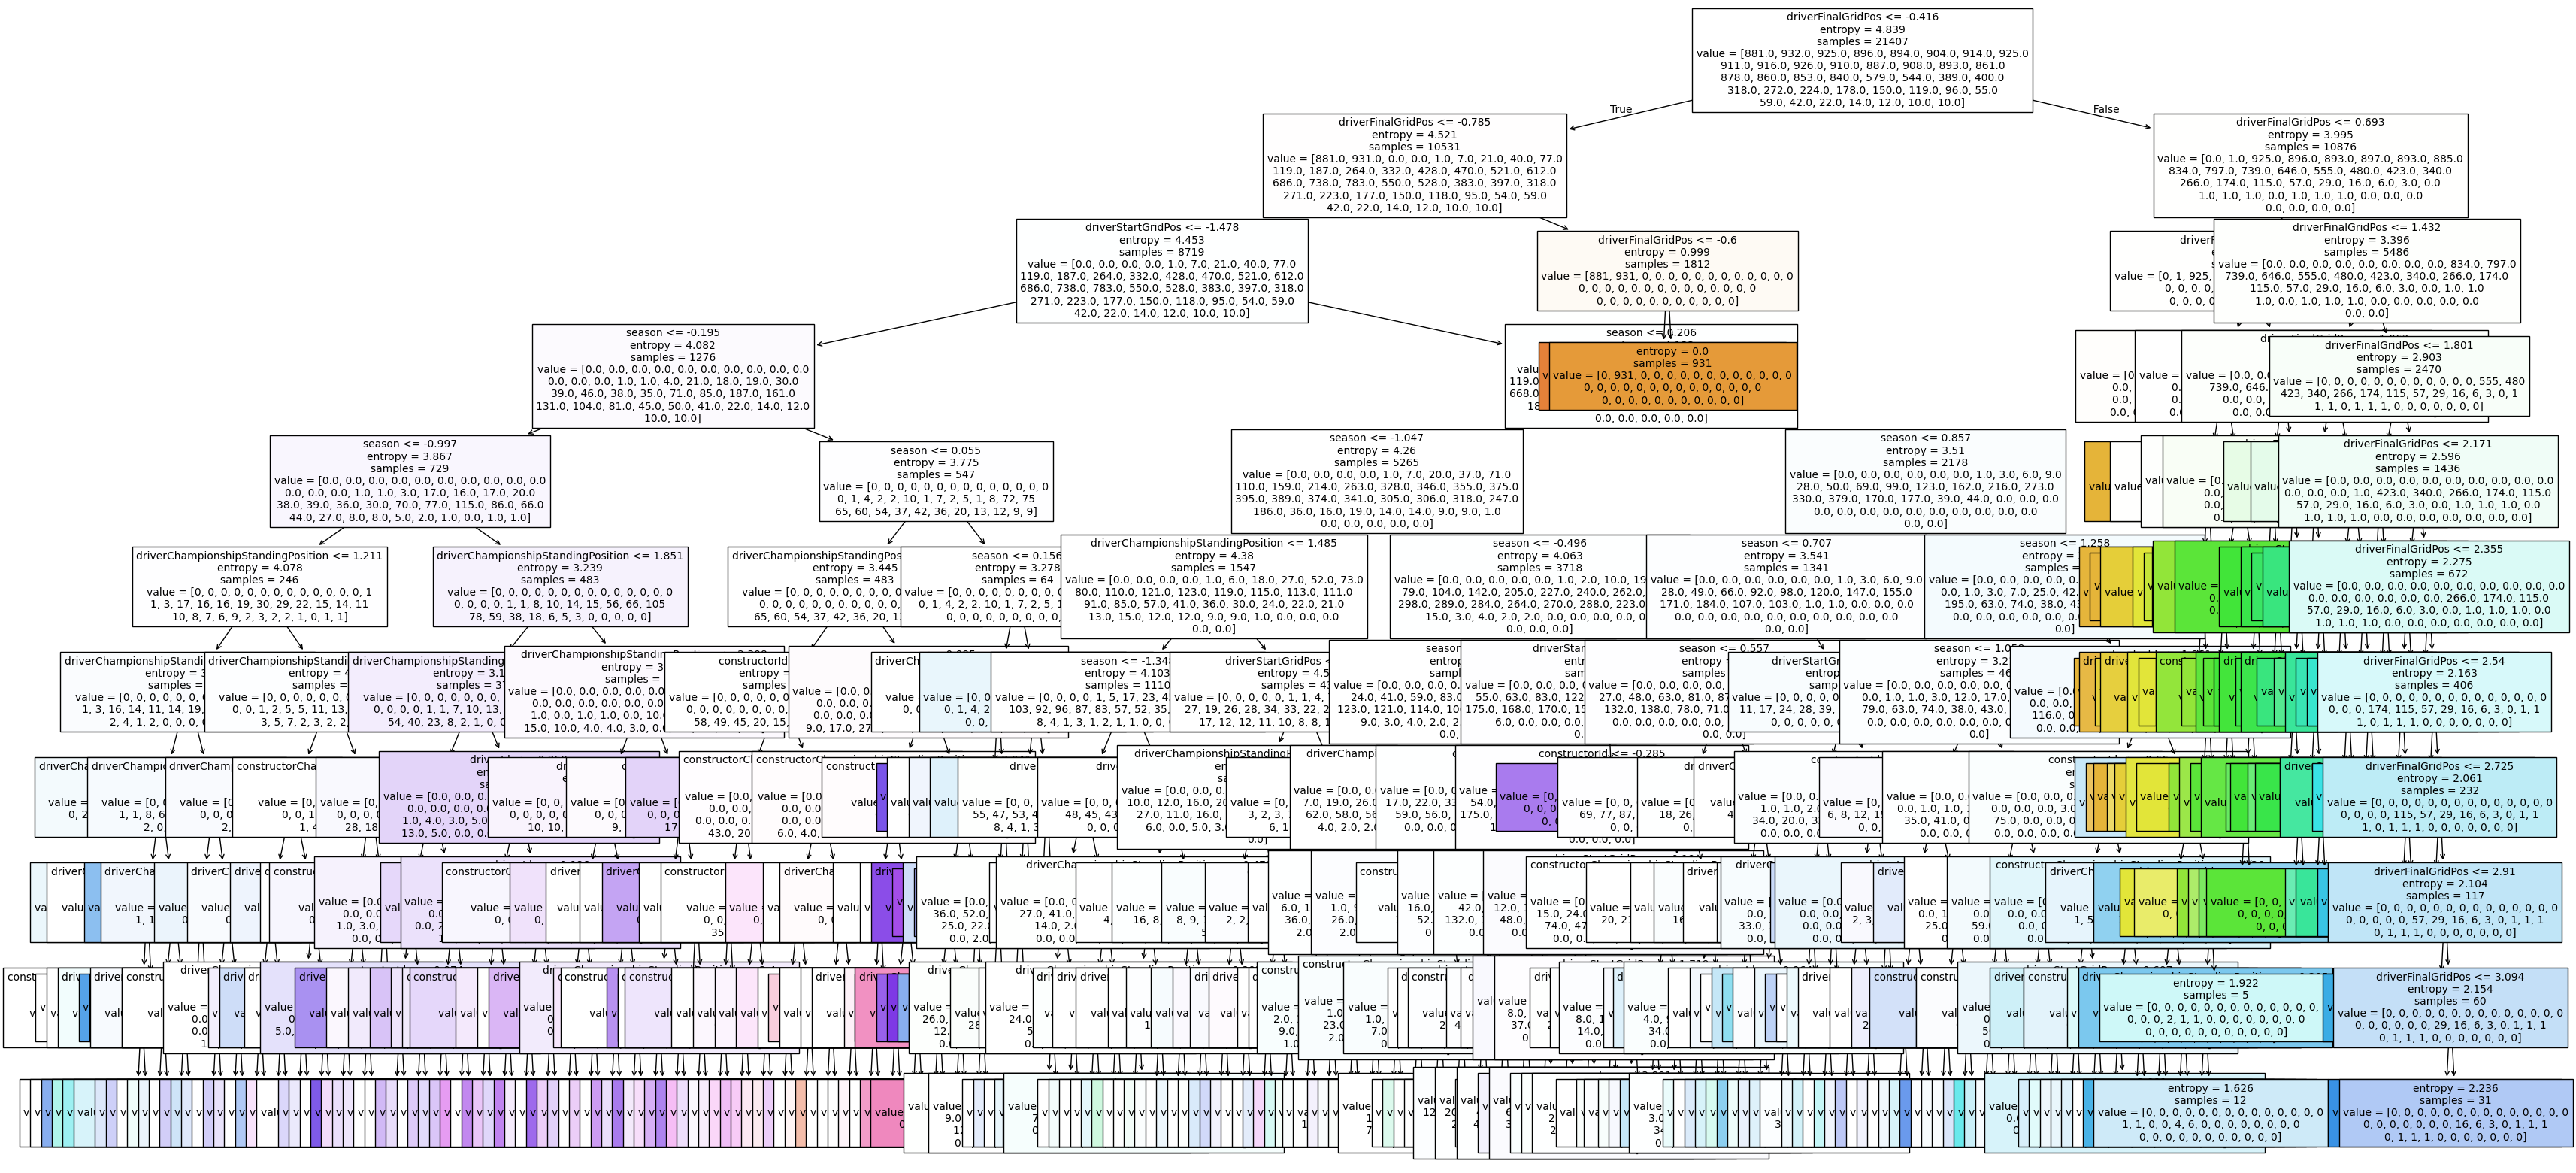

In [ ]:
#plotting the decision tree
fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(clf_best, feature_names=features, filled=True, fontsize=10)
plt.show()

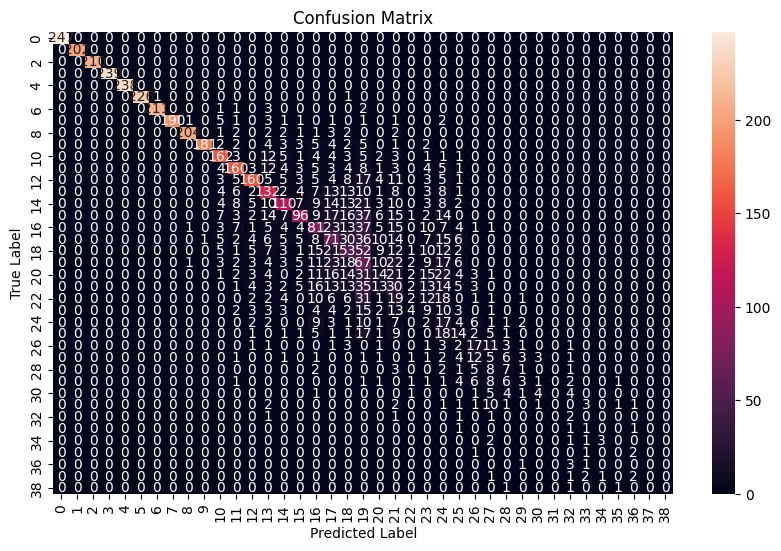

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       247
           2       1.00      1.00      1.00       202
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       239
           5       1.00      1.00      1.00       238
           6       1.00      0.99      1.00       228
           7       1.00      0.97      0.98       218
           8       1.00      0.92      0.96       207
           9       0.99      0.93      0.96       220
          10       0.99      0.85      0.91       214
          11       0.77      0.78      0.78       207
          12       0.76      0.73      0.74       220
          13       0.80      0.67      0.73       239
          14       0.56      0.62      0.59       214
          15       0.67      0.48      0.56       227
          16       0.68      0.39      0.49       246
          17       0.37      0.36      0.37       222
          18       0.29    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


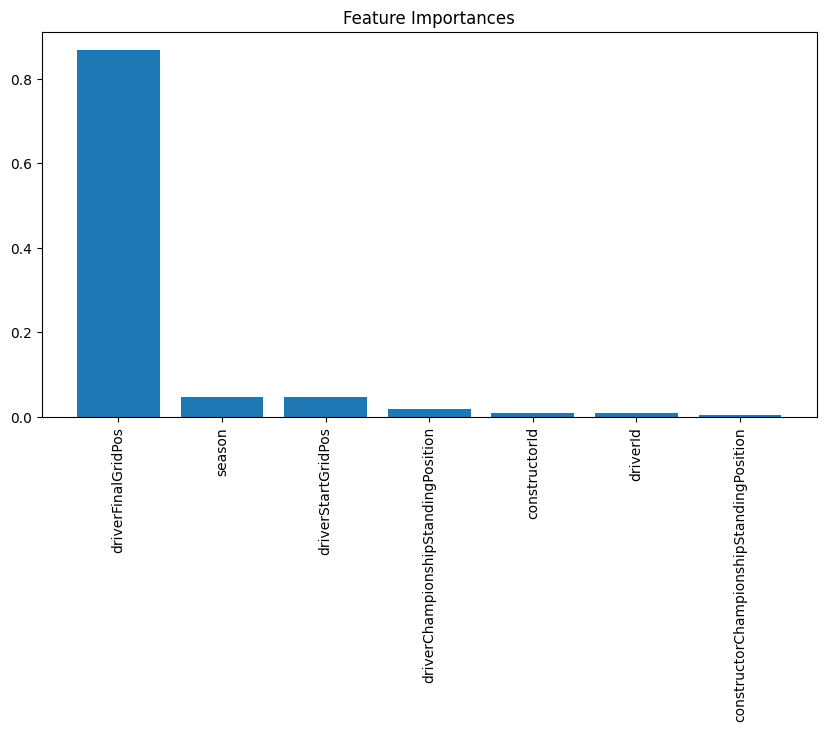

In [ ]:
# Get the feature importances
importances = clf_best.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by importance
indices = importances.argsort()[::-1]

# Create a bar chart of the feature importances
plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

In [ ]:
# Convert the problem to a binary classification problem
y_train_bin = (y_train <= 3)
y_test_bin = (y_test <= 3)

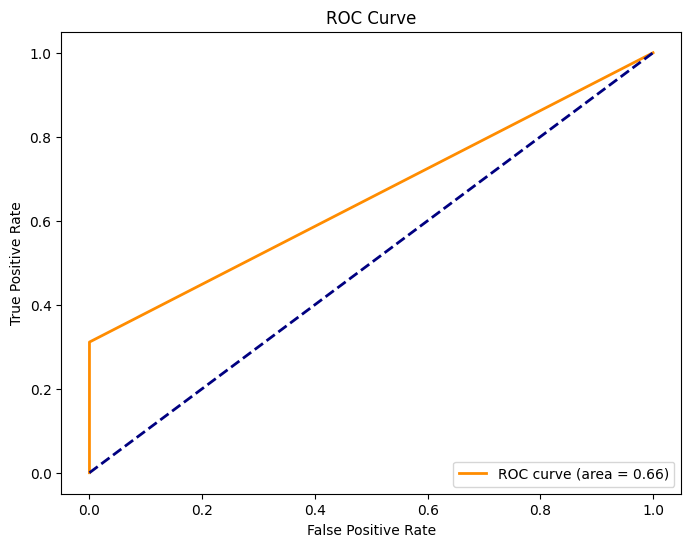

In [ ]:
# Create an ROC curve
y_score = clf_best.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

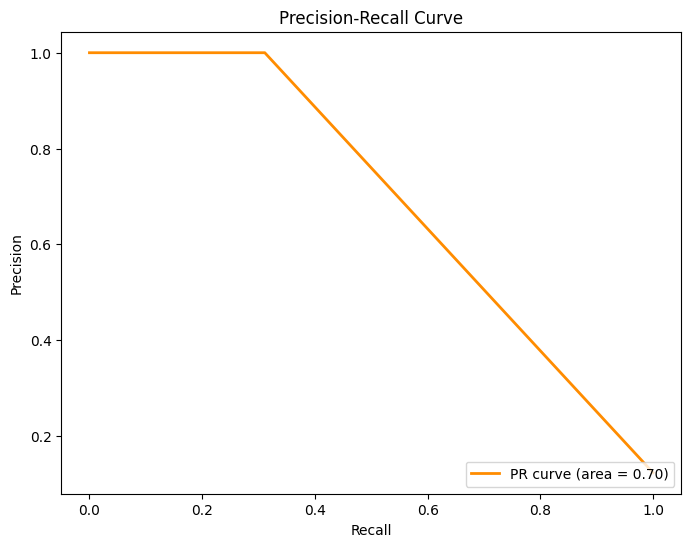

In [ ]:
# Create a precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_score)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Bayes

In [ ]:
df = pd.read_csv('final_df.csv')


In [ ]:
features = ['season','driverId','constructorId','driverStartGridPos', 'driverFinalGridPos',
            'driverChampionshipStandingPosition','constructorChampionshipStandingPosition']

#Dropping unnecessary features and setting target variable - driver ranking in each race
#and split dataset into training(80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(df[features], df['driverFinalRank'], test_size=0.2, random_state=42)

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Model Accuracy: 0.32903587443946186
Mean Absolute Error (MAE): 3.338191330343797
Root Mean Squared Error (RMSE): 5.276474283739628
R² Score: 0.5276984248570561


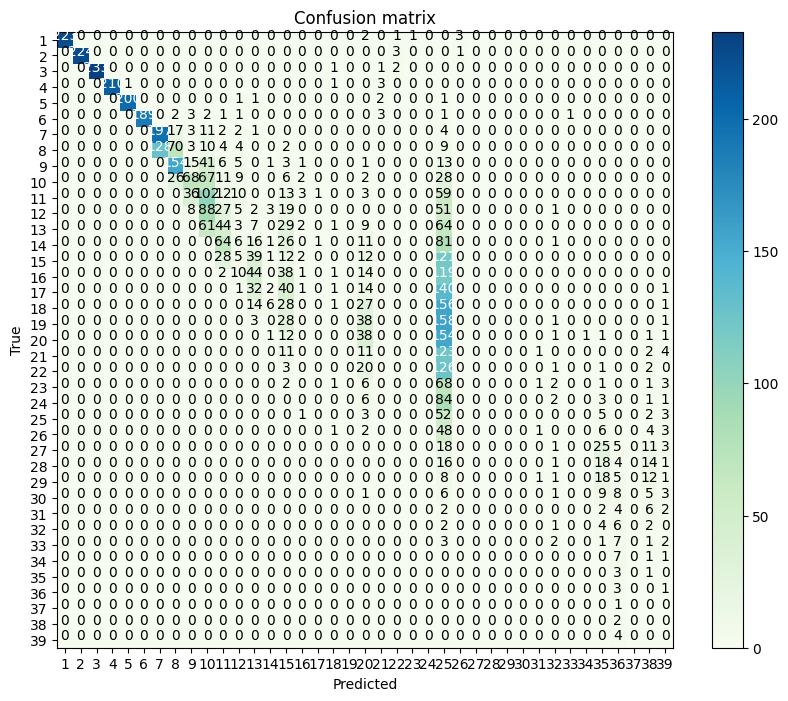

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
plt.imshow(cm, cmap=plt.cm.GnBu)
plt.title("Confusion matrix")
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

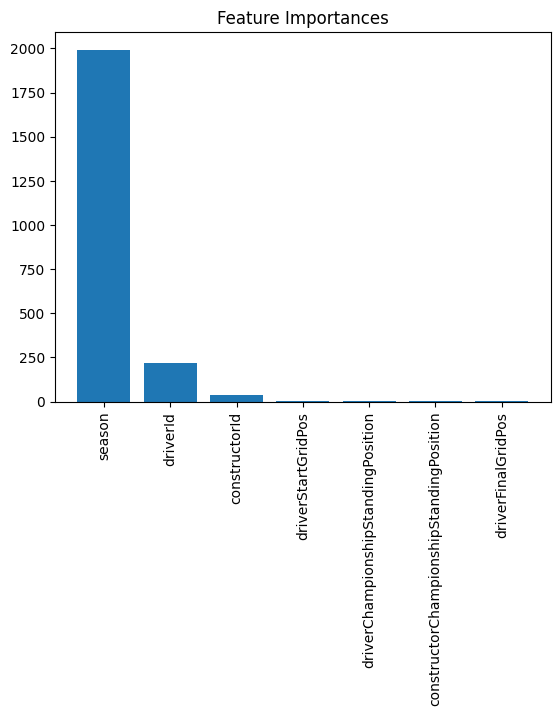

In [ ]:
# Plot the feature importance graph
importances = gnb.theta_[0]
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("Feature Importances")
plt.show()

In [ ]:
# Calculating classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.97      0.98       230
           2       1.00      0.98      0.99       228
           3       1.00      0.98      0.99       237
           4       1.00      0.98      0.99       215
           5       1.00      0.98      0.99       205
           6       1.00      0.93      0.96       203
           7       0.61      0.83      0.70       237
           8       0.26      0.30      0.28       230
           9       0.11      0.06      0.08       240
          10       0.18      0.31      0.22       219
          11       0.06      0.05      0.05       239
          12       0.08      0.02      0.04       204
          13       0.04      0.03      0.04       220
          14       0.07      0.00      0.01       207
          15       0.04      0.05      0.05       220
          16       0.08      0.00      0.01       229
          17       0.00      0.00      0.00       232
          18       0.12    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


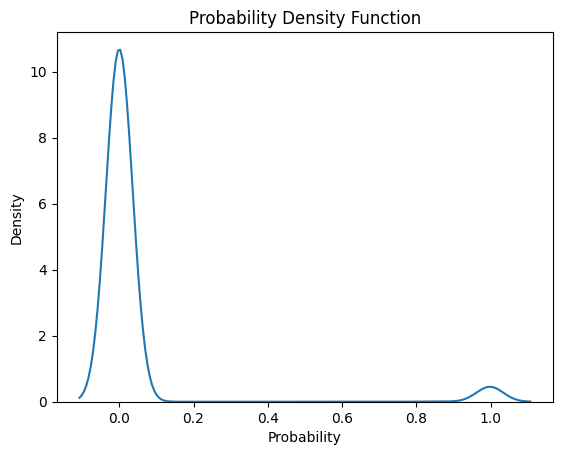

In [ ]:
y_prob = gnb.predict_proba(X_test)[:,1]
sns.kdeplot(y_prob, label='Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()

# Random Forest

In [ ]:
# Drop non-relevant columns (IDs, categorical features that are not useful for modeling)
drop_cols = ["driverId", "constructorId", "circuitId"]
X = final_df.drop(columns=drop_cols + ["positionOrder"])  # Drop target variable
y = final_df["positionOrder"]  # Target variable: Position in race

# Standardize numerical features (for models that need scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n {model_name} Performance:")
    print(f" MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f" MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f" R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")



 Random Forest Performance:
 MAE: 3.1126
 MSE: 18.4086
 R² Score: 0.6761

 XGBoost Performance:
 MAE: 4.2873
 MSE: 29.5592
 R² Score: 0.4800


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                 n_iter=10, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, "Optimized Random Forest")


Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Optimized Random Forest Performance:
 MAE: 3.1103
 MSE: 18.3161
 R² Score: 0.6778


In [ ]:
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor([
    ('rf', best_rf),
    ('xgb', xgb_model)
])
ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)
evaluate_model(y_test, y_pred_ensemble, "Ensemble Model")



 Ensemble Model Performance:
 MAE: 3.6699
 MSE: 22.2924
 R² Score: 0.6078


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_


KeyboardInterrupt: 

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBRegressor()

param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(xgb_model, param_dist, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, n_iter=20)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_


In [ ]:
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

print("Optimized Random Forest:")
evaluate_model(y_test, y_pred_rf)

print("Optimized XGBoost:")
evaluate_model(y_test, y_pred_xgb)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'positionOrder' is the target column in your 'final_df'
target_col = 'positionOrder'
X = final_df.drop(columns=[target_col])  # Features
y = final_df[target_col]  # Target

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train model with best parameters
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate performance
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized MAE: {mae_optimized:.2f}")
print(f"Optimized R² Score: {r2_optimized:.2f}")
